In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes
import numpy as np

In [80]:
dfRetro = pd.read_csv('C:\\Users\\Sam\\Documents\\Data Mining\\Project\\retrosheet-events-plus-woba-2005_2015.csv')
altitudes = pd.read_excel("C:\\Users\\Sam\\Documents\\Data Mining\\Project\\Park_Factor\\Project_Code\\MLB_Stadium_Altitudes.xlsx")

In [81]:
dfRetro = dfRetro.drop(['time_since_1900', 'wOBA_pts', 'bat_hand_cd', 'base1_run_id', 'base2_run_id', 'base3_run_id','pitch_seq_tx','po1_fld_cd', 'po2_fld_cd','pit_start_fl', 'pa_ball_ct', 'pa_strike_ct', 'bat_fate_id', 'run1_fate_id', 'run2_fate_id', 'run3_fate_id', 'battedball_cd', 'inn_new_fl', 'inn_end_fl', 'pit_hand_cd'], axis=1)


In [82]:
#now drop any unnecessary events we don't need 
#stolen bases (4), caught stealing (6), pickoff (8), 

dfRetro = dfRetro[dfRetro.event_cd != 4]
dfRetro = dfRetro[dfRetro.event_cd != 6]
dfRetro = dfRetro[dfRetro.event_cd != 8]


In [83]:
events_with_altitudes = pd.merge(dfRetro, altitudes, on='home_team_id')


In [84]:
###Calculating runs per 9 here 
#creating sorted array of team ids
team_ids = []
for ii in dfRetro.home_team_id.unique():
    team_ids.append(ii)
team_ids = sorted(team_ids)
#initializing 2d array for total runs 
total_runs = [[0 for i in range(2)] for j in range(31)] 
for i in range(0,31):
     total_runs[i][0] = team_ids[i]
index = 0
#getting total runs for each team
for ii in team_ids:
    dfTemp = dfRetro.loc[dfRetro['home_team_id'] == ii]
    total_runs[index][1] = dfTemp['event_runs_ct'].sum()
    index +=1
    

In [85]:
#making variable with only one event per game so it is easy to count how many games were played 
test = events_with_altitudes.drop_duplicates('game_id')
games_played = test.groupby('home_team_id').size()

innings_played = games_played * 9

#Florida Marlins became Miami Marlins, storing them all under MIA 
#changing innings played 
innings_played['MIA'] = innings_played['FLO']+ innings_played['MIA']
del innings_played['FLO']

#total runs 
#FLO is 11, MIA is 15 
total_runs[15][1] += total_runs[11][1]
del total_runs[11]


In [86]:
#Calculating runs per 9, storing in 2d array
runs_per_9 = [[0 for i in range(2)] for j in range(30)] 
for i in range(0,30):
     runs_per_9[i][0] = team_ids[i]
#print(runs_per_9)

for i in range(len(total_runs)):
    #print(innings_played[i])
    num = (total_runs[i][1] * 9)
    denom = innings_played[i]
    runs_per_9[i][1] = num/denom
    #runs_per_9[i][1] = ((total_runs[i][1] * 9)/innings_played[i])


In [87]:
#storing just runs per 9 in an array for graphing
per_9 = []
for ii in range(len(runs_per_9)):
    per_9.append(runs_per_9[ii][1])
print(per_9)

[8.5634118967452295, 9.4287317620650946, 8.4017957351290686, 9.4966292134831463, 9.9955106621773293, 9.1683501683501678, 8.8977528089887645, 9.1647982062780269, 8.9133858267716537, 10.888888888888889, 9.3995510662177324, 8.5426966292134825, 9.1795735129068454, 8.0, 8.7205387205387197, 9.0751964085297416, 8.9719416386083051, 9.6228956228956228, 8.1964085297418627, 8.3108866442199769, 9.1212121212121211, 8.4365881032547705, 7.4062850729517393, 7.9439461883408073, 7.8698092031425366, 8.4393258426966291, 8.5589225589225588, 10.095398428731762, 9.2154882154882163, 8.4398200224971873]


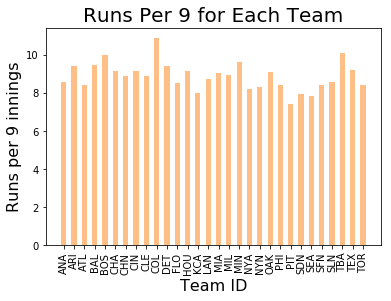

In [88]:
#Graph runs per 9 vs team id 
plt.title("Runs Per 9 for Each Team", size=20)
plt.xlabel("Team ID", size=16)
plt.ylabel("Runs per 9 innings", size=16)
y_pos = np.arange(len(runs_per_9))
plt.bar(y_pos, per_9, align='center', alpha=0.5, width=0.5)
plt.xticks(y_pos, team_ids, rotation='vertical')
plt.figure(figsize=(50, 3))

plt.show()

In [89]:
alts = []
#print(sorted(altitudes['altitude']))

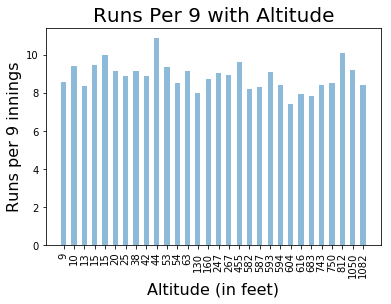

In [90]:
#graphing runs per 9 vs altitude 
plt.title("Runs Per 9 with Altitude", size=20)
plt.xlabel("Altitude (in feet)", size=16)
plt.ylabel("Runs per 9 innings", size=16)
y_pos = np.arange(len(runs_per_9))
plt.bar(y_pos, per_9, align='center', alpha=0.5, width=0.5)
plt.xticks(y_pos, sorted(altitudes['altitude']), rotation='vertical')
plt.figure(figsize=(50, 3))

plt.show()

In [91]:
league_runs = 0
league_inn_played = sum(innings_played)

for ii in range(len(total_runs)):
    league_runs += total_runs[ii][1]
league_runs = league_runs * 9
league_avg = league_runs / league_inn_played 
print(league_avg)


8.88220326298


In [92]:
#removing now unnecessarry FLO team id entry 
del team_ids[11]
altitudes = altitudes.drop(21)

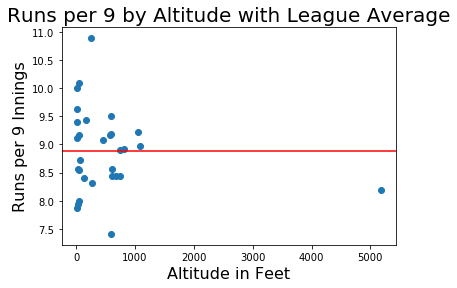

In [93]:
x = altitudes['altitude']
y = per_9
line = league_avg
#line = ax.plot(x,line)
fig, ax = plt.subplots()
plt.axhline(league_avg, color='r')
plt.xlabel("Altitude in Feet", size=16)
plt.ylabel("Runs per 9 Innings", size=16)
plt.title("Runs per 9 by Altitude with League Average", size=20)

scatter = ax.scatter(x,y)

plt.show()

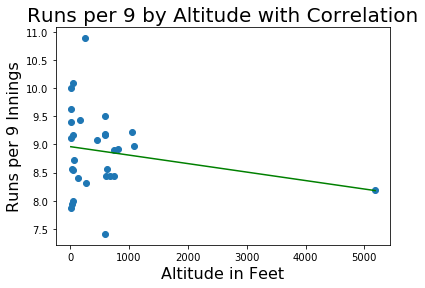

In [102]:
x = altitudes['altitude']
y = per_9
line = league_avg
#line = ax.plot(x,line)
fig, ax = plt.subplots()
plt.xlabel("Altitude in Feet", size=16)
plt.ylabel("Runs per 9 Innings", size=16)
plt.title("Runs per 9 by Altitude with Correlation", size=20)

scatter = ax.scatter(x,y)

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='green')
plt.show()

In [95]:
#creating dataframe for correlation calculation 
d = {'Team': team_ids,'runs_per_9': per_9, 'altitudes': altitudes['altitude']} 
dfCor = pd.DataFrame(data=d)


In [96]:
dfCor['altitudes'].corr(dfCor['runs_per_9'])

-0.19441618383260126

[9, 10, 13, 15, 20, 25, 38, 42, 44, 53, 54, 63, 130, 160, 247, 267, 455, 582, 587, 593, 594, 604, 616, 683, 743, 750, 812, 1050, 1082, 5183]
